In [27]:
import osmnx as ox
import networkx as nx
import pandas as pd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point

import os
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import GOSTnets as gn
import numpy as np
import seaborn as sns
from shapely import wkt

In [115]:
mapaLimaCallao = pd.read_csv('rutas/MapaLimaCallao.csv')
mapaLimaCallao['geometry'] = mapaLimaCallao['geometry'].apply(wkt.loads)
mapaLimaCallao = gpd.GeoDataFrame(mapaLimaCallao, crs='epsg:4326')
mapaLimaCallao['distrito2'] = mapaLimaCallao.apply(lambda x: x['distrito'].replace(' ','_'), axis=1)
mapaLimaCallao.head()

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry,LimaCallao,distrito2
0,7,CALLAO,701,CALLAO,70105,LA PUNTA,LA PUNTA,1,1,INEI,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0...",True,LA_PUNTA
1,7,CALLAO,701,CALLAO,70104,LA PERLA,LA PERLA,1,1,INEI,"POLYGON ((-77.10444 -12.07020, -77.10486 -12.0...",True,LA_PERLA
2,7,CALLAO,701,CALLAO,70102,BELLAVISTA,BELLAVISTA,1,1,INEI,"POLYGON ((-77.10086 -12.06307, -77.10317 -12.0...",True,BELLAVISTA
3,7,CALLAO,701,CALLAO,70103,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,1,1,INEI,"POLYGON ((-77.08317 -12.03925, -77.08263 -12.0...",True,CARMEN_DE_LA_LEGUA_REYNOSO
4,7,CALLAO,701,CALLAO,70101,CALLAO,CALLAO,1,1,INEI,"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9...",True,CALLAO


<AxesSubplot:>

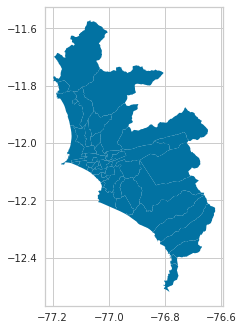

In [116]:
mapaLimaCallao.plot()

<AxesSubplot:>

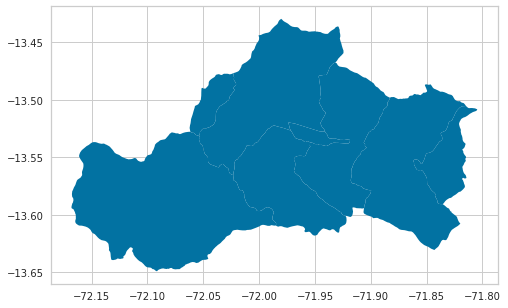

In [516]:
mapaCusco = gpd.read_file("shapes_cusco/CUSCO_CCPP.shp")
mapaCusco.plot()

In [517]:
mapaCusco.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,08,CUSCO,0801,CUSCO,080106,SANTIAGO,SANTIAGO,0001,1,INEI,"POLYGON ((-71.98587 -13.52254, -71.98535 -13.5..."
1,08,CUSCO,0801,CUSCO,080108,WANCHAQ,WANCHAQ,0001,1,INEI,"POLYGON ((-71.94640 -13.52731, -71.94352 -13.5..."
2,08,CUSCO,0801,CUSCO,080102,CCORCA,CCORCA,0001,1,INEI,"POLYGON ((-72.06031 -13.52861, -72.05967 -13.5..."
3,08,CUSCO,0801,CUSCO,080105,SAN SEBASTIAN,SAN SEBASTIAN,0001,1,INEI,"POLYGON ((-71.91077 -13.47772, -71.90878 -13.4..."
4,08,CUSCO,0801,CUSCO,080107,SAYLLA,SAYLLA,0001,1,INEI,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5..."


In [518]:
mapaCusco['DISTRITO'].unique()

array(['SANTIAGO', 'WANCHAQ', 'CCORCA', 'SAN SEBASTIAN', 'SAYLLA',
       'SAN JERONIMO', 'POROY', 'CUSCO'], dtype=object)

In [441]:
data = pd.read_csv("rutas/public_transport_distancias_avg_complete.csv", 
                   dtype={'osmid':'string'}).set_index('distrito')
data.drop(['osmid', 'casino'], axis=1,inplace=True)
data['mean'] = data.mean(axis=1)
data.head()

,bank,courthouse,hospital,marketplace,police,school,university,mean
distrito,,,,,,,,
ANCON,113.268633,12864.185560,660.074286,142.259601,123.372555,227.012899,12864.185560,3856.337013
ATE,79.236870,524.908226,264.865743,126.050592,80.254092,60.969187,842.512643,282.685336
BARRANCO,303.416273,12864.185560,0.007351,386.885248,144.907134,128.779303,389.078205,2031.037010
BELLAVISTA,31.780734,12864.185560,258.807464,12864.185560,12864.185560,18.517244,461.192805,5623.264990
BREÑA,497.938326,1691.865368,628.437937,187.948879,962.791985,89.569331,1271.534057,761.440841


In [514]:
df.columns

Index(['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school',
       'university', 'mean', 'kmeans'],
      dtype='object')

In [515]:
datacusco = pd.read_csv("rutas/cusco_means_final.csv", 
                   dtype={'osmid':'string'}).set_index('distrito')
datacusco.columns = ['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school', 'university']
# datacusco.drop(['osmid', 'casino'], axis=1,inplace=True)
datacusco['mean'] = datacusco.mean(axis=1)
datacusco.head()

,bank,courthouse,hospital,marketplace,police,school,university,mean
distrito,,,,,,,,
WANCHAQ,1447.575817,2966.837119,1337.955883,1306.987792,1182.920595,226.204805,1344.420839,1401.843264
SAYLLA,7046.504675,9016.650675,9398.580675,759.344239,961.408589,513.095366,3970.234675,4523.688413
SANTIAGO,2299.777700,2437.442743,1900.574810,1323.971965,1967.714253,513.208113,2290.998949,1819.098362
SAN SEBASTIAN,2695.503379,3542.493804,2834.577142,3489.850076,3753.057049,1735.661693,3232.375522,3040.502666
SAN JERONIMO,1521.779245,2800.974155,2966.001130,2262.192983,1944.031129,490.107351,1635.192614,1945.754087


In [539]:
datacusco.describe()

,bank,courthouse,hospital,marketplace,police,school,university,mean
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3454.693801,5185.803275,4862.636436,2514.612135,2872.096771,650.598527,4143.476835,3383.416826
std,2205.026135,3052.416771,3519.701555,1596.878528,1836.587298,475.976702,3109.208967,1901.079143
min,1447.575817,2437.442743,1337.955883,759.344239,961.408589,226.204805,1344.420839,1401.843264
25%,1634.975628,2925.371378,2601.076559,1319.725922,1753.753495,432.986586,2127.047365,1914.090155
50%,2497.640540,3865.502577,3325.879601,1939.883304,2044.892511,513.151739,3570.055102,2801.387545
75%,5362.133460,6802.441180,6883.726498,3638.159908,4161.404983,727.889591,4430.243105,4600.596361
max,7046.504675,10469.145000,10732.202000,5273.887000,5659.123000,1735.661693,10956.589000,6942.855185


In [442]:
(data/1000).reset_index().head()

,distrito,bank,courthouse,hospital,marketplace,police,school,university,mean
0,ANCON,0.113269,12.864186,0.660074,0.142260,0.123373,0.227013,12.864186,3.856337
1,ATE,0.079237,0.524908,0.264866,0.126051,0.080254,0.060969,0.842513,0.282685
2,BARRANCO,0.303416,12.864186,0.000007,0.386885,0.144907,0.128779,0.389078,2.031037
3,BELLAVISTA,0.031781,12.864186,0.258807,12.864186,12.864186,0.018517,0.461193,5.623265
4,BREÑA,0.497938,1.691865,0.628438,0.187949,0.962792,0.089569,1.271534,0.761441


In [443]:
mapa = pd.merge(mapaLimaCallao, (data/1000).reset_index(), how='left', left_on='distrito2', right_on='distrito')

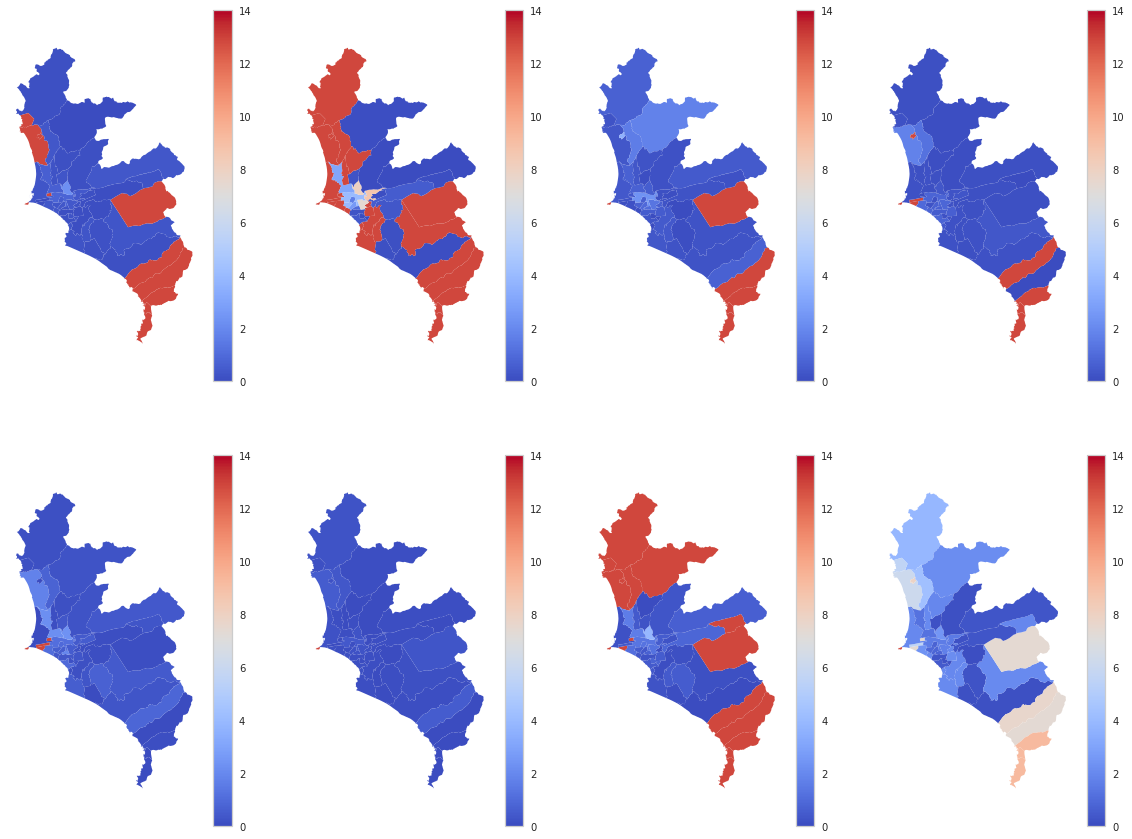

In [536]:
fig , axes = plt.subplots(2,4, figsize = (20,15))

CMAP = 'coolwarm'

mapa.plot(column='bank', cmap=CMAP, legend=True, ax=axes[0][0], vmin=0, vmax=14)
mapa.plot(column='courthouse', cmap=CMAP, legend=True, ax=axes[0][1], vmin=0, vmax=14)
mapa.plot(column='hospital', cmap=CMAP, legend=True, ax=axes[0][2], vmin=0, vmax=14)
mapa.plot(column='marketplace', cmap=CMAP, legend=True, ax=axes[0][3], vmin=0, vmax=14)
mapa.plot(column='police', cmap=CMAP, legend=True, ax=axes[1][0], vmin=0, vmax=14)
mapa.plot(column='school', cmap=CMAP, legend=True, ax=axes[1][1], vmin=0, vmax=14)
mapa.plot(column='university', cmap=CMAP, legend=True, ax=axes[1][2], vmin=0, vmax=14)
mapa.plot(column='mean', cmap=CMAP, legend=True, ax=axes[1][3], vmin=0, vmax=14)

for idx, x in np.ndenumerate(axes):
    x.grid(False)
    x.axis(False)
# fig

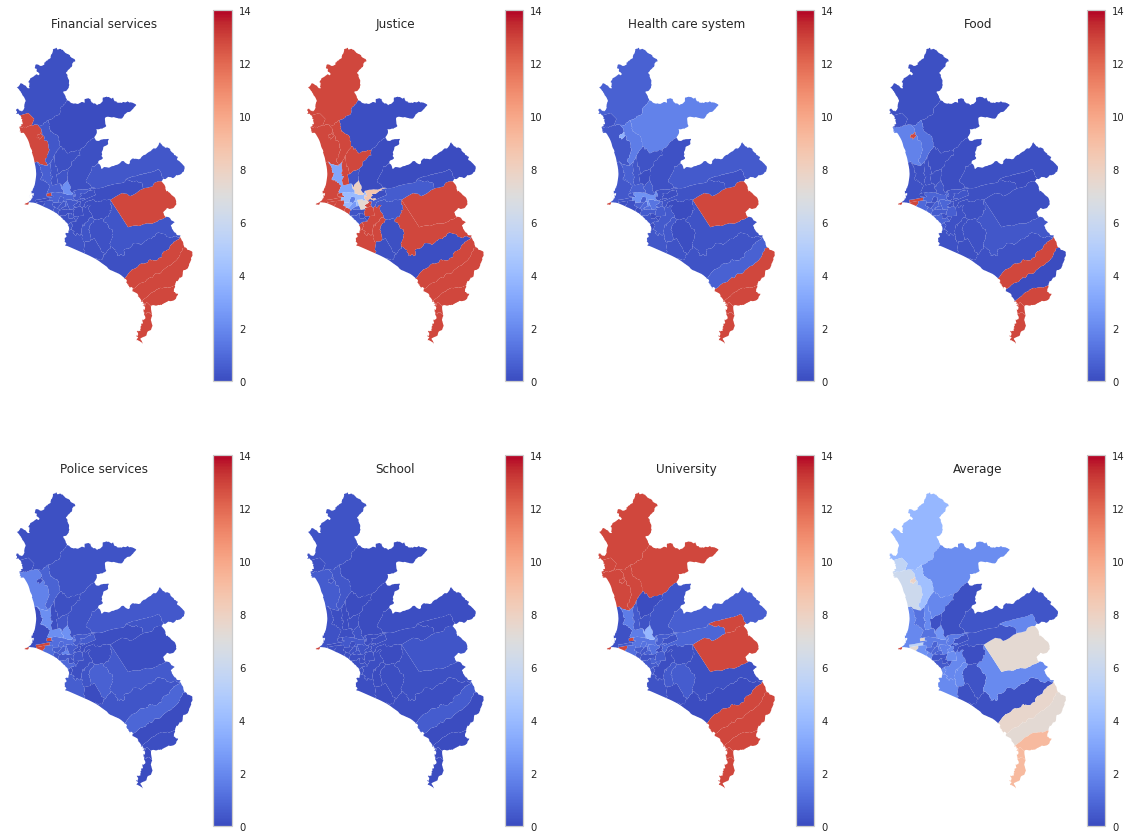

In [537]:
features = ['Financial services', 
            'Justice', 
            'Health care system', 
            'Food',
            'Police services', 
            'School',
            'University',
            'Average'
           ]
features = np.reshape(features, (2,4))

for idx, x in np.ndenumerate(axes):
#     print(idx)
    x.grid(False)
    x.axis(False)
    x.set_title(features[idx[0], idx[1]])
fig

In [538]:
fig.savefig("simbig22_img/LimaPublicServices.png", bbox_inches='tight', dpi=500)

# MapaCusco

In [521]:
mapaCusco2 = pd.merge(mapaCusco, (datacusco/1000).reset_index(), 
                      how='left', 
                      left_on='DISTRITO', right_on='distrito')
mapaCusco2.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry,distrito,bank,courthouse,hospital,marketplace,police,school,university,mean
0,08,CUSCO,0801,CUSCO,080106,SANTIAGO,SANTIAGO,0001,1,INEI,"POLYGON ((-71.98587 -13.52254, -71.98535 -13.5...",SANTIAGO,2.299778,2.437443,1.900575,1.323972,1.967714,0.513208,2.290999,1.819098
1,08,CUSCO,0801,CUSCO,080108,WANCHAQ,WANCHAQ,0001,1,INEI,"POLYGON ((-71.94640 -13.52731, -71.94352 -13.5...",WANCHAQ,1.447576,2.966837,1.337956,1.306988,1.182921,0.226205,1.344421,1.401843
2,08,CUSCO,0801,CUSCO,080102,CCORCA,CCORCA,0001,1,INEI,"POLYGON ((-72.06031 -13.52861, -72.05967 -13.5...",CCORCA,5.706286,6.064371,6.045442,4.083089,5.386449,0.723336,5.810268,4.831320
3,08,CUSCO,0801,CUSCO,080105,SAN SEBASTIAN,SAN SEBASTIAN,0001,1,INEI,"POLYGON ((-71.91077 -13.47772, -71.90878 -13.4...",SAN SEBASTIAN,2.695503,3.542494,2.834577,3.489850,3.753057,1.735662,3.232376,3.040503
4,08,CUSCO,0801,CUSCO,080107,SAYLLA,SAYLLA,0001,1,INEI,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",SAYLLA,7.046505,9.016651,9.398581,0.759344,0.961409,0.513095,3.970235,4.523688


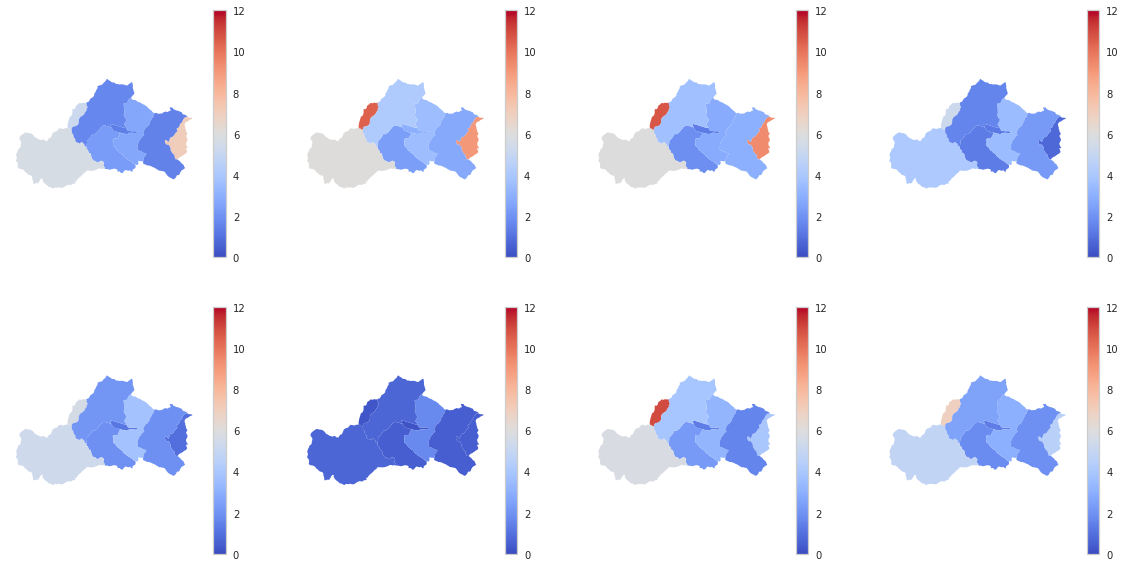

In [546]:
fig , axes = plt.subplots(2,4, figsize = (20,10), sharey=True)

CMAP = 'coolwarm'

mapaCusco2.plot(column='bank', cmap=CMAP, legend=True, ax=axes[0][0], vmin=0, vmax=12)
mapaCusco2.plot(column='courthouse', cmap=CMAP, legend=True, ax=axes[0][1], vmin=0, vmax=12)
mapaCusco2.plot(column='hospital', cmap=CMAP, legend=True, ax=axes[0][2], vmin=0, vmax=12)
mapaCusco2.plot(column='marketplace', cmap=CMAP, legend=True, ax=axes[0][3], vmin=0, vmax=12)
mapaCusco2.plot(column='police', cmap=CMAP, legend=True, ax=axes[1][0], vmin=0, vmax=12)
mapaCusco2.plot(column='school', cmap=CMAP, legend=True, ax=axes[1][1], vmin=0, vmax=12)
mapaCusco2.plot(column='university', cmap=CMAP, legend=True, ax=axes[1][2], vmin=0, vmax=12)
mapaCusco2.plot(column='mean', cmap=CMAP, legend=True, ax=axes[1][3], vmin=0, vmax=12)

for idx, x in np.ndenumerate(axes):
    x.grid(False)
    x.axis(False)
# fig

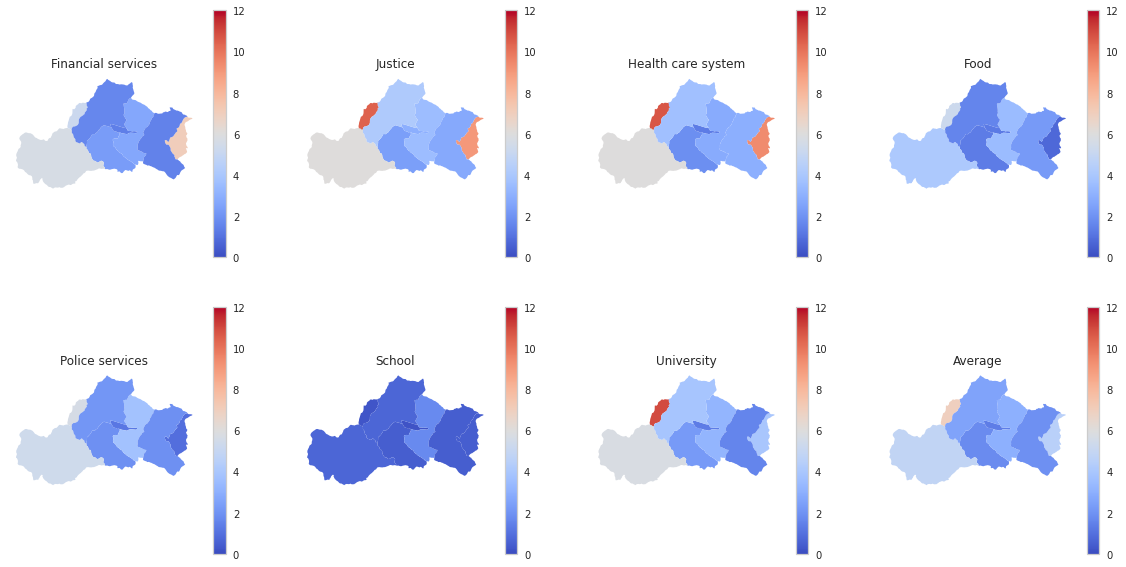

In [547]:
features = ['Financial services', 
            'Justice', 
            'Health care system', 
            'Food',
            'Police services', 
            'School',
            'University',
            'Average'
           ]
features = np.reshape(features, (2,4))

for idx, x in np.ndenumerate(axes):
#     print(idx)
    x.grid(False)
    x.axis(False)
    x.set_title(features[idx[0], idx[1]])
fig

In [548]:
fig.savefig("simbig22_img/CuscoPublicServices.png", bbox_inches='tight', dpi=500)

In [447]:
# # from sklearn.datasets import fetch_mldata
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import time

# df = data

# time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(df)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [448]:
# df['tsne-2d-one'] = tsne_results[:,0]
# df['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(5,5))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
# #     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df,
#     legend="full",
#     alpha=0.3
# )

# kMeans

In [489]:
data.columns

Index(['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school',
       'university', 'mean'],
      dtype='object')

In [492]:
%%time
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import time

features = ['bank', 
#             'casino', 
            'courthouse', 
            'hospital', 
            'marketplace',
            'police', 
            'school',
            'university'
           ]

df = data
train = df[features]
# train = matrix
# X_scaled = MinMaxScaler().fit_transform(train)
X = train

n_clusters = range(2,20)
# list(range(2,21))
results = []

for k in n_clusters:
    start = time.time()
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    end = time.time()
    duration = end - start
    results.append((k, model.inertia_, duration))

resDF = pd.DataFrame(results, columns=['k', 'distorsion score', 'time']).set_index('k')
resDF.head()

CPU times: user 629 ms, sys: 3.77 ms, total: 633 ms
Wall time: 632 ms


,distorsion score,time
k,,
2,3.700225e+09,0.013649
3,2.519664e+09,0.015285
4,1.975062e+09,0.019449
5,1.490627e+09,0.022679
6,1.207057e+09,0.024470


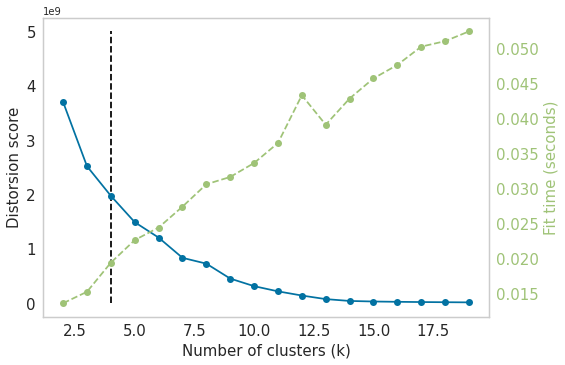

In [494]:
fig, ax = plt.subplots()

ax = resDF.plot(kind='line', y='distorsion score', ax=ax, marker='o')

ax2 = ax.twinx()
resDF.plot(kind='line', y='time', ax=ax2, color='g', marker='o', linestyle='--')
ax.vlines(x=4, ymin=0, ymax=5e9, linestyles='--', color='black')
ax.grid(False)
ax2.grid(False)

ax.tick_params(axis='both', which='major', labelsize='15')
ax2.tick_params(axis='both', which='major', labelsize='15', colors='g')
ax.set_xlabel("Number of clusters (k)", fontsize=15)
ax.set_ylabel("Distorsion score", fontsize=15)
ax2.set_ylabel("Fit time (seconds)", fontsize=15, color='g')

# ax.annotate('elbow at k=4', xy=(6, 1), xytext=(7, 1), fontsize=15, color='red',
#             arrowprops=dict(color='red', width=1.5))

ax.legend().remove()
ax2.legend().remove()

fig.savefig("simbig22_img/LimaElbowCurve.png", bbox_inches='tight', dpi=500)

In [ ]:
## Silouete

In [484]:
# ['Cluster' + str(x) for x in cluster_labels]

For n_clusters = 2 The average silhouette_score is : 0.5488765382768777
For n_clusters = 3 The average silhouette_score is : 0.5335683379622461
For n_clusters = 4 The average silhouette_score is : 0.5473952379654037
For n_clusters = 5 The average silhouette_score is : 0.5800930493181926
For n_clusters = 6 The average silhouette_score is : 0.6248828652588845
For n_clusters = 7 The average silhouette_score is : 0.633822267186359
For n_clusters = 8 The average silhouette_score is : 0.6736325856579033
For n_clusters = 9 The average silhouette_score is : 0.7074005516718147


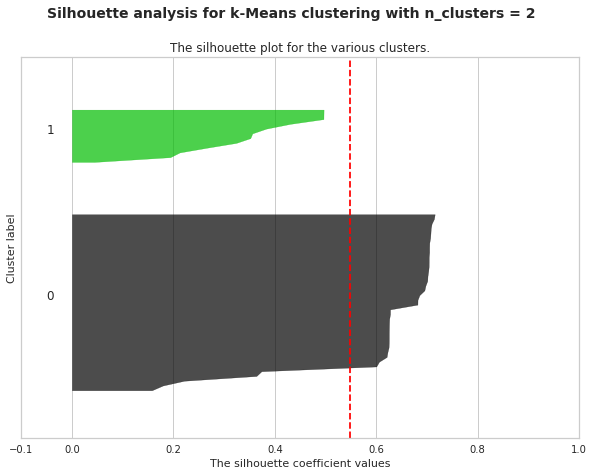

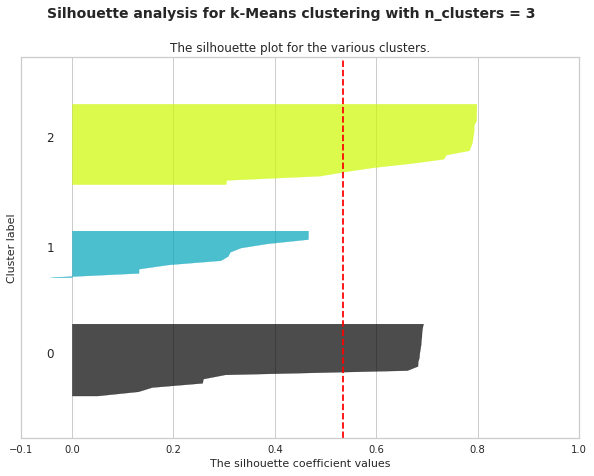

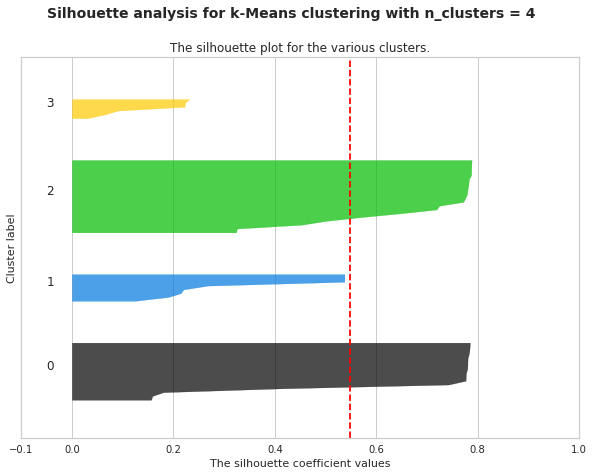

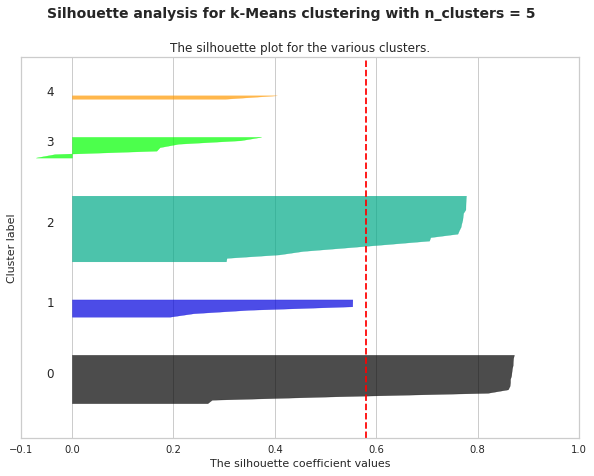

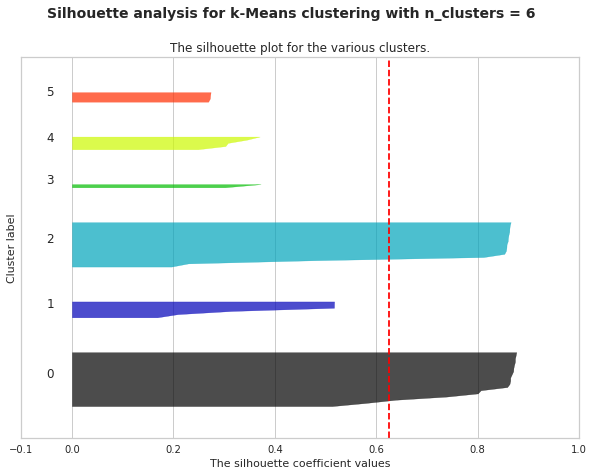

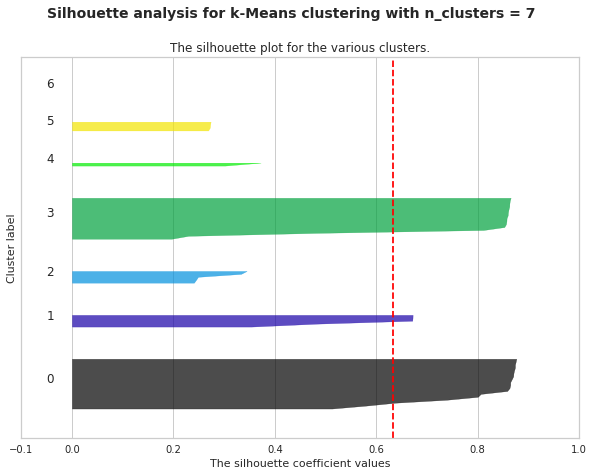

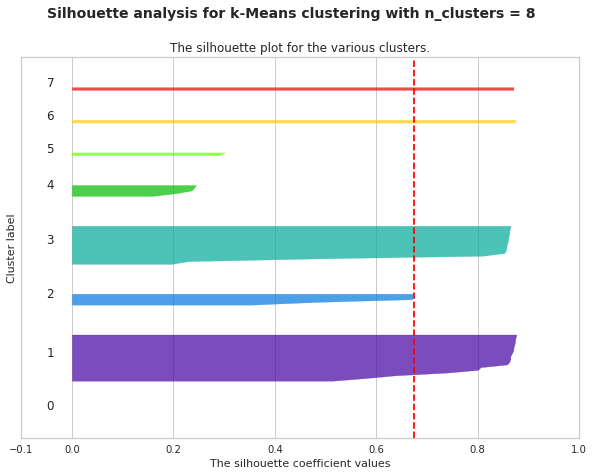

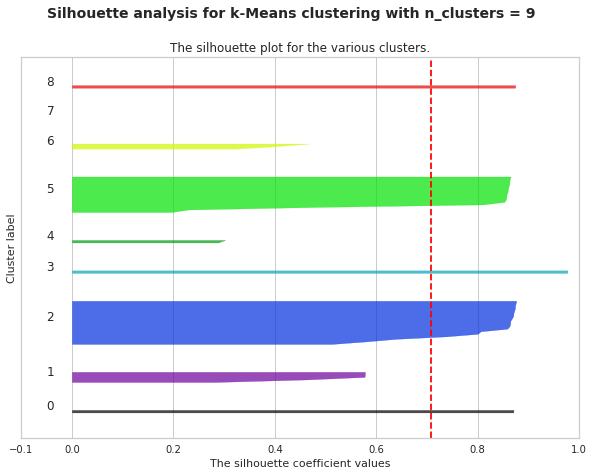

In [495]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

features = ['bank', 
#             'casino', 
            'courthouse', 
            'hospital', 
            'marketplace',
            'police', 
            'school',
            'university'
           ]

df = data
train = df[features]
# train = matrix
# X_scaled = MinMaxScaler().fit_transform(train)
X = train.values

# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
#     cluster_labels = ['Cluster' + str(x) for x in cluster_labels]

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for k-Means clustering with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    fig.savefig("simbig22_img/silhouette_n{}.png".format(n_clusters))
plt.show()

In [467]:
# fig

In [496]:
%%time
#k-Means
features = ['bank', 
#             'casino', 
            'courthouse', 
            'hospital', 
            'marketplace',
            'police', 
            'school',
            'university'
           ]

train = df[features]
# X_scaled = MinMaxScaler().fit_transform(train)
X = train
#k-means
k = 4
kmeansModel = KMeans(n_clusters=k, random_state=0)
kmeansModel.fit(X)

df['kmeans'] = kmeansModel.labels_
df['kmeans'] = 'Cluster ' + df['kmeans'].astype(str)
df.head()

CPU times: user 22.3 ms, sys: 0 ns, total: 22.3 ms
Wall time: 21.2 ms


,bank,courthouse,hospital,marketplace,police,school,university,mean,kmeans
distrito,,,,,,,,,
ANCON,113.268633,12864.185560,660.074286,142.259601,123.372555,227.012899,12864.185560,3856.337013,Cluster 0
ATE,79.236870,524.908226,264.865743,126.050592,80.254092,60.969187,842.512643,282.685336,Cluster 1
BARRANCO,303.416273,12864.185560,0.007351,386.885248,144.907134,128.779303,389.078205,2031.037010,Cluster 2
BELLAVISTA,31.780734,12864.185560,258.807464,12864.185560,12864.185560,18.517244,461.192805,5623.264990,Cluster 2
BREÑA,497.938326,1691.865368,628.437937,187.948879,962.791985,89.569331,1271.534057,761.440841,Cluster 1


In [497]:
df.to_csv('Kmeans.csv')

In [498]:
cols = ['kmeans']
kmeans_dict = df[cols].to_dict()['kmeans']

mapaLimaCallao['distrito2'] = mapaLimaCallao.apply(lambda x: x['distrito'].replace(' ','_'), axis=1)
mapaLimaCallao['kmeans'] = mapaLimaCallao.apply(lambda x: kmeans_dict[x['distrito2']], axis=1)
# mapaLimaCallao.head()

In [499]:
tmp = df.groupby('kmeans').mean()[features]/1000
tmp.style.background_gradient(cmap='PRGn')

,bank,courthouse,hospital,marketplace,police,school,university
kmeans,,,,,,,
Cluster 0,6.514106,12.864186,0.563319,2.702807,4.748724,0.229422,12.864186
Cluster 1,0.253872,0.943908,0.538724,0.286727,0.608945,0.099504,1.799128
Cluster 2,0.374375,11.960064,0.384729,1.171505,1.239595,0.101408,0.621810
Cluster 3,12.864186,12.864186,10.172771,9.663299,1.747944,1.742286,12.864186


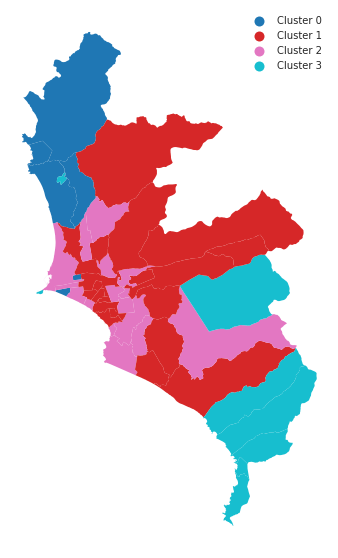

In [502]:
fig, ax = plt.subplots(figsize = (10,10))
mapaLimaCallao.plot(column='kmeans', 
                    cmap='tab10', 
#                     figsize = (20,20), 
                    legend=True,
                    categorical=True,
                    ax=ax
                   )
ax.grid(False)
ax.axis(False)
fig.savefig("simbig22_img/LimaMapaKmeans.png", bbox_inches='tight', dpi=500)

In [555]:
[print(i, x) for i, x in enumerate(df.reset_index().groupby('kmeans')['distrito'].unique())]

0 ['ANCON' 'CARMEN_DE_LA_LEGUA_REYNOSO' 'LA_PERLA' 'PUENTE_PIEDRA'
 'SANTA_ROSA' 'VENTANILLA']
1 ['ATE' 'BREÑA' 'CARABAYLLO' 'CHACLACAYO' 'INDEPENDENCIA' 'JESUS_MARIA'
 'LA_MOLINA' 'LIMA' 'LINCE' 'LURIGANCHO' 'LURIN' 'MIRAFLORES'
 'PUEBLO_LIBRE' 'SANTA_ANITA' 'SAN_ISIDRO' 'SAN_JUAN_DE_LURIGANCHO'
 'SAN_MARTIN_DE_PORRES' 'SURQUILLO' 'VILLA_EL_SALVADOR'
 'VILLA_MARIA_DEL_TRIUNFO']
2 ['BARRANCO' 'BELLAVISTA' 'CALLAO' 'CHORRILLOS' 'COMAS' 'EL_AGUSTINO'
 'LA_VICTORIA' 'LOS_OLIVOS' 'MAGDALENA_DEL_MAR' 'PACHACAMAC' 'RIMAC'
 'SANTIAGO_DE_SURCO' 'SAN_BORJA' 'SAN_JUAN_DE_MIRAFLORES' 'SAN_LUIS'
 'SAN_MIGUEL']
3 ['CIENEGUILLA' 'LA_PUNTA' 'MI_PERU' 'PUCUSANA' 'PUNTA_HERMOSA'
 'PUNTA_NEGRA' 'SANTA_MARIA_DEL_MAR' 'SAN_BARTOLO']


[None, None, None, None]

In [561]:
x = df.reset_index().groupby('kmeans')['distrito'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'str'

In [584]:
for item in x:
    cad = ', '.join(item)
    cad = cad.replace('_',' ')
    cad = cad.capitalize()
    print(cad)

Ancon, carmen de la legua reynoso, la perla, puente piedra, santa rosa, ventanilla
Ate, breña, carabayllo, chaclacayo, independencia, jesus maria, la molina, lima, lince, lurigancho, lurin, miraflores, pueblo libre, santa anita, san isidro, san juan de lurigancho, san martin de porres, surquillo, villa el salvador, villa maria del triunfo
Barranco, bellavista, callao, chorrillos, comas, el agustino, la victoria, los olivos, magdalena del mar, pachacamac, rimac, santiago de surco, san borja, san juan de miraflores, san luis, san miguel
Cieneguilla, la punta, mi peru, pucusana, punta hermosa, punta negra, santa maria del mar, san bartolo


# Radar Plot

In [503]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [504]:
def example_data():
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]

    return data

In [505]:
def data2plot(cluster):
    cols = ['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school','university']
    tmp = df.loc[df['kmeans'] == cluster, cols].reset_index()
    key = cluster
    values = (tmp[cols]/1000).to_numpy()
    return (key, values)

In [506]:
def example_data2():
    data = [
        ['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school','university'],
        data2plot('Cluster 0'),
        data2plot('Cluster 1'),
        data2plot('Cluster 2'),
        data2plot('Cluster 3'), 
#         data2plot('Cluster 4'),
#         data2plot('C5'),
#         data2plot('C6'),
    ]
    return data

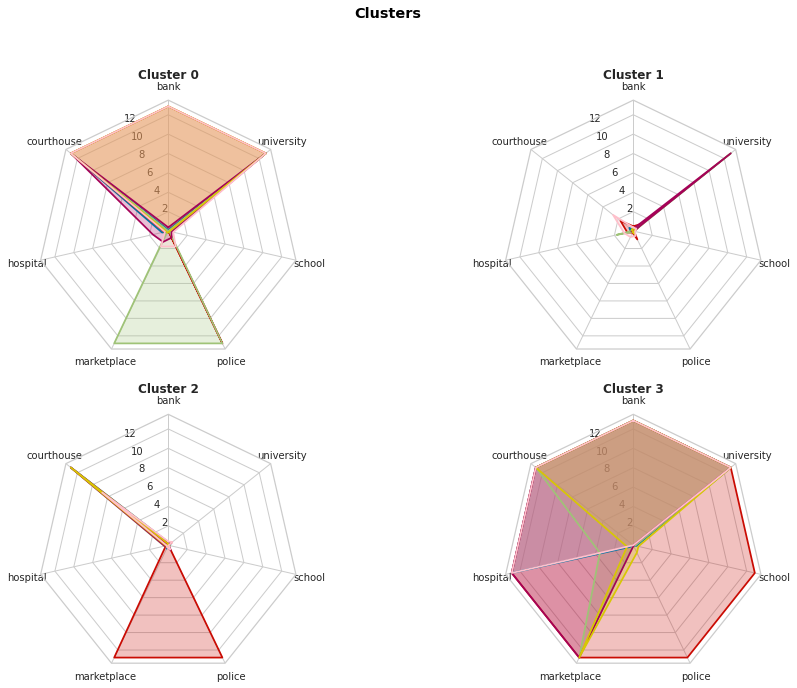

In [508]:
if __name__ == '__main__':
    N = 7
    theta = radar_factory(N, frame='polygon')

    data = example_data2()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(15, 10), nrows=2, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y','pink']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
#         ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        r = list(range(2,14,2))
        ax.set_rgrids(r)
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
#     labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
#     legend = axs[0, 0].legend(labels, loc=(0.9, .95),
#                               labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, 'Clusters',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

In [510]:
fig.savefig("simbig22_img/clusters_radial.png", dpi=500)

In [432]:
cluster = 'Cluster 3'
cols = ['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school','university']
tmp = (df.loc[df['kmeans'] == cluster, cols]/1000).reset_index()
tmp

,distrito,bank,courthouse,hospital,marketplace,police,school,university
0,BELLAVISTA,0.031781,12.864186,0.258807,12.864186,12.864186,0.018517,0.461193
1,LA_PERLA,0.000006,12.864186,0.105445,12.864186,12.864186,0.110573,12.864186


# DBScan

In [17]:
%%time
from sklearn.cluster import DBSCAN
#k-Means
features = ['bank', 
#             'casino', 
            'courthouse', 
            'hospital', 
            'marketplace',
            'police', 
            'school',
            'university'
           ]

train = df[features]

X = train

clustering = DBSCAN(eps=3, min_samples=2).fit(X)
print(clustering.labels_)

clustering

df['dbscan'] = clustering.labels_
df.head()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
CPU times: user 5.69 ms, sys: 155 µs, total: 5.84 ms
Wall time: 19.8 ms


,bank,casino,courthouse,hospital,marketplace,police,school,university,tsne-2d-one,tsne-2d-two,kmeans,dbscan
distrito,,,,,,,,,,,,
ANCON,113.268633,12864.185560,12864.185560,660.074286,142.259601,123.372555,227.012899,12864.185560,2.047988,-23.494846,4,-1
ATE,79.236870,315.136131,524.908226,264.865743,126.050592,80.254092,60.969187,842.512643,-6.165866,-41.762688,3,-1
BARRANCO,303.416273,226.680443,12864.185560,0.007351,386.885248,144.907134,128.779303,389.078205,-11.840443,-5.642140,0,-1
BELLAVISTA,31.780734,12864.185560,12864.185560,258.807464,12864.185560,12864.185560,18.517244,461.192805,7.765011,-60.211765,5,-1
BREÑA,497.938326,898.135606,1691.865368,628.437937,187.948879,962.791985,89.569331,1271.534057,15.778687,-7.208807,3,-1


In [18]:
set(clustering.labels_)

{-1}

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

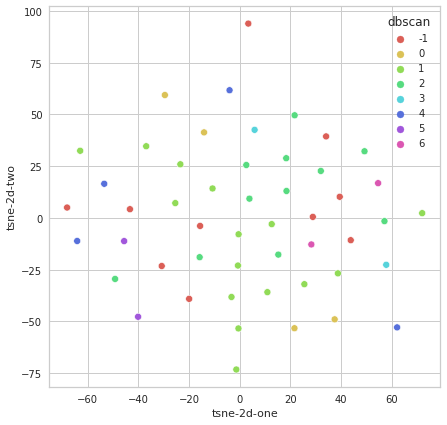

In [49]:
k = len(set(clustering.labels_))

plt.figure(figsize=(7,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("hls", k),
    data=df,
    legend="full",
#     alpha=0.3
)

In [50]:
df.reset_index().sort_values('dbscan')

,district,bank_dist,courthouse_dist,hospital_dist,marketplace_dist,police_dist,school_dist,university_dist,tsne-2d-one,tsne-2d-two,kmeans,dbscan
0,ancon,7.704448,99.000000,5.695014,2.781386,6.068907,1.340739,99.000000,43.802593,-10.767971,1,-1
23,lurin,3.677210,5.095849,6.735243,2.515241,3.128620,1.366161,7.530785,34.082020,39.369129,2,-1
27,pachacamac,6.473313,99.000000,11.449518,2.071445,3.067170,1.248594,13.700207,28.849140,0.485506,1,-1
30,puente_piedra,3.255684,99.000000,3.959908,1.274434,2.038884,0.483277,99.000000,-19.945251,-39.103397,1,-1
31,punta_hermosa,99.000000,99.000000,4.677729,99.000000,4.636647,1.437419,99.000000,-43.290237,4.208823,0,-1
22,lurigancho,7.320638,99.000000,21.046934,2.376797,3.404312,0.952920,4.791883,3.397490,93.872581,1,-1
8,chaclacayo,3.168231,3.349987,3.676956,1.277155,1.657805,0.653061,99.000000,-30.755629,-23.240419,2,-1
10,cieneguilla,99.000000,99.000000,99.000000,4.557271,6.234100,3.802000,99.000000,-68.092094,5.011693,0,-1
6,carabayllo,5.086770,5.297592,7.452323,3.447587,3.441472,0.707013,99.000000,-15.619768,-3.883145,2,-1
1,ate,2.273455,8.999862,2.411523,1.166379,2.277237,0.545557,6.032080,39.462868,10.205628,2,-1


# Optics

In [19]:
%%time
from sklearn.cluster import OPTICS
#k-Means
features = ['bank', 
            'casino', 
            'courthouse', 
            'hospital', 
            'marketplace',
            'police', 
            'school',
            'university'
           ]

train = df[features]

X = train

clustering = OPTICS(min_samples=2).fit(X)
print(set(clustering.labels_))

clustering

df['optics'] = clustering.labels_
df.head()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
CPU times: user 602 ms, sys: 51.8 ms, total: 654 ms
Wall time: 651 ms


,bank,casino,courthouse,hospital,marketplace,police,school,university,tsne-2d-one,tsne-2d-two,kmeans,dbscan,optics
distrito,,,,,,,,,,,,,
ANCON,113.268633,12864.185560,12864.185560,660.074286,142.259601,123.372555,227.012899,12864.185560,2.047988,-23.494846,4,-1,-1
ATE,79.236870,315.136131,524.908226,264.865743,126.050592,80.254092,60.969187,842.512643,-6.165866,-41.762688,3,-1,1
BARRANCO,303.416273,226.680443,12864.185560,0.007351,386.885248,144.907134,128.779303,389.078205,-11.840443,-5.642140,0,-1,2
BELLAVISTA,31.780734,12864.185560,12864.185560,258.807464,12864.185560,12864.185560,18.517244,461.192805,7.765011,-60.211765,5,-1,9
BREÑA,497.938326,898.135606,1691.865368,628.437937,187.948879,962.791985,89.569331,1271.534057,15.778687,-7.208807,3,-1,-1


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

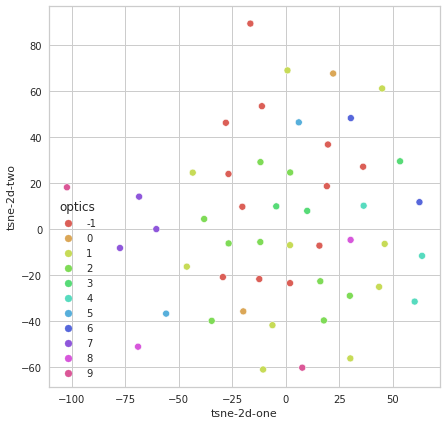

In [20]:
k = len(set(clustering.labels_))

plt.figure(figsize=(7,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="optics",
    palette=sns.color_palette("hls", k),
    data=df,
    legend="full",
#     alpha=0.3
)

In [21]:
df.sort_values('optics')

,bank,casino,courthouse,hospital,marketplace,police,school,university,tsne-2d-one,tsne-2d-two,kmeans,dbscan,optics
distrito,,,,,,,,,,,,,
ANCON,113.268633,12864.185560,12864.185560,660.074286,142.259601,123.372555,227.012899,12864.185560,2.047988,-23.494846,4,-1,-1
RIMAC,2246.451090,2980.563739,7991.736085,561.907853,369.888109,2329.952736,232.332423,3843.762312,-29.337955,-20.862677,0,-1,-1
LIMA,811.803914,2970.508470,3999.620425,2374.786596,777.722507,1094.704306,420.419514,1334.675988,19.264858,18.625830,3,-1,-1
LA_VICTORIA,421.081346,1202.030234,7415.755396,1352.492691,848.950156,531.621275,238.405623,1256.109124,-12.320397,-21.719271,0,-1,-1
BREÑA,497.938326,898.135606,1691.865368,628.437937,187.948879,962.791985,89.569331,1271.534057,15.778687,-7.208807,3,-1,-1
SAN_MARTIN_DE_PORRES,613.277323,1167.406038,3108.404398,700.939013,155.473372,2212.042291,67.545667,1614.707033,-20.242668,9.683139,3,-1,-1
CARABAYLLO,26.529428,35.752773,69.462931,1761.605085,100.969897,271.875354,57.874325,12864.185560,-27.947269,46.160728,3,-1,-1
CARMEN_DE_LA_LEGUA_REYNOSO,12864.185560,12864.185560,12864.185560,406.878300,0.002312,12864.185560,28.918202,12864.185560,-16.492542,89.247269,2,-1,-1
CHACLACAYO,234.854058,12864.185560,69.179300,202.292007,41.423933,316.630208,27.960549,12864.185560,-11.100388,53.371040,6,-1,-1


# Results 

In [63]:
columns_dist = ['bank_dist', 'courthouse_dist', 'hospital_dist', 'marketplace_dist',
       'police_dist', 'school_dist', 'university_dist', 
               'kmeans']
df.sort_values('kmeans')[columns_dist]

,bank_dist,courthouse_dist,hospital_dist,marketplace_dist,police_dist,school_dist,university_dist,kmeans
district,,,,,,,,
ancon,7.704448,99.000000,5.695014,2.781386,6.068907,1.340739,99.000000,0
carabayllo,5.086770,5.297592,7.452323,3.447587,3.441472,0.707013,99.000000,0
carmen_de_la_legua_reynoso,1.051426,1.046387,1.212121,0.430686,0.639592,0.352251,99.000000,0
chaclacayo,3.168231,3.349987,3.676956,1.277155,1.657805,0.653061,99.000000,0
puente_piedra,3.255684,99.000000,3.959908,1.274434,2.038884,0.483277,99.000000,0
la_perla,0.769345,1.358078,2.218304,0.878485,0.851766,0.455293,99.000000,0
ventanilla,2.140000,6.345118,3.299252,1.306825,2.824698,0.888776,4.357383,1
surquillo,0.919275,2.415734,1.129390,0.616465,0.690635,0.456124,1.975930,1
santa_anita,1.106808,1.163849,1.266832,0.758924,1.795619,0.277775,1.439307,1


In [61]:
df.kmeans.unique()

array([0, 1, 2, 3], dtype=int32)